<a href="https://colab.research.google.com/github/jeeswan/Data-Warehousing-and-Data-Mining-/blob/main/DW_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

In [2]:
url = "https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol=ADBL&fromDate=2020-04-19&toDate=2025-05-19&pageNo=1&itemsPerPage=10&pagePerDisplay=5&_=1747618698241"
response = requests.get(url)
data = response.json()
stock_data = data.get("result", {}).get("data", [])
df = pd.DataFrame(stock_data)
df.to_csv("adbl_stock_history.csv", index=False)

In [3]:
import requests
import pandas as pd

def fetchStockData(symbol,start_date,end_date):
  url = f"https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol={symbol}&fromDate={start_date}&toDate={end_date}&pageNo=1&itemsPerPage=1000&pagePerDisplay=5&_=1747618698241"
  response = requests.get(url)
  data = response.json()

  stock_data = data.get("result", {}).get("data", [])
  df = pd.DataFrame(stock_data)
  df.to_csv(f"{symbol}_stock_history.csv", index=False)

In [4]:
fetchStockData("PCBL", "2020-01-01", "2025-01-01")

### Data Cleaning

In [5]:
df = pd.read_csv("PCBL_stock_history.csv")
df.head()

,sn,tradeDate,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
0,1,2025-01-01T00:00:00,2025-01-01,260.0,255.2,257.0,119,30102,7759064.6,259.0,-2.0,-0.77
1,2,2024-12-31T00:00:00,2024-12-31,263.3,250.0,259.0,255,70142,17787116.9,258.2,0.8,0.31
2,3,2024-12-29T00:00:00,2024-12-29,268.0,257.1,258.2,221,64692,16877058.0,261.1,-2.9,-1.11
3,4,2024-12-26T00:00:00,2024-12-26,270.0,254.5,261.1,378,105595,27866041.6,258.9,2.2,0.85
4,5,2024-12-24T00:00:00,2024-12-24,260.0,253.9,258.9,264,62220,15994137.4,256.9,2.0,0.78


In [6]:
isnull = df.isnull()
isnull_count = isnull.sum()
print(f"Total Null Value is {isnull_count}")

Total Null Value is sn                  0
tradeDate           0
tradeDateString     0
maxPrice            0
minPrice            0
closingPrice        0
noOfTransactions    0
volume              0
amount              0
previousClosing     0
differenceRs        0
percentChange       0
dtype: int64


### Daily to Weekly and Plot

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("PCBL_stock_history.csv", parse_dates=["tradeDate"])

df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

In [9]:
weekly_data = pd.DataFrame()
weekly_data["closingPrice"] = df["closingPrice"].resample("W-FRI").last()
weekly_data["maxPrice"] = df["maxPrice"].resample("W-FRI").max()
weekly_data["minPrice"] = df["minPrice"].resample("W-FRI").min()
weekly_data["volume"] = df["volume"].resample("W-FRI").sum()
weekly_data["amount"] = df["amount"].resample("W-FRI").sum()
weekly_data["noOfTransactions"] = df["noOfTransactions"].resample("W-FRI").sum()

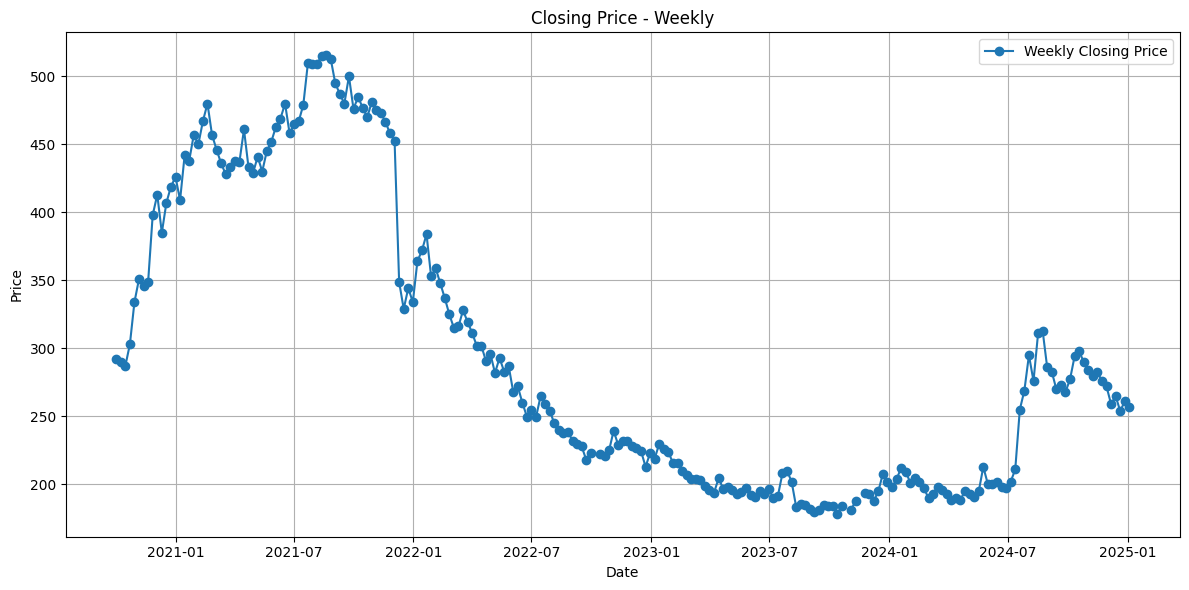

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data["closingPrice"], marker='o', label="Weekly Closing Price")
plt.title("Closing Price - Weekly")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Date to Monthly Format and Plot

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("PCBL_stock_history.csv", parse_dates=["tradeDate"])

df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

In [13]:
monthly_data = pd.DataFrame()
monthly_data["closingPrice"] = df["closingPrice"].resample("M").last()
monthly_data["maxPrice"] = df["maxPrice"].resample("M").max()
monthly_data["minPrice"] = df["minPrice"].resample("M").min()
monthly_data["volume"] = df["volume"].resample("M").sum()
monthly_data["amount"] = df["amount"].resample("M").sum()
monthly_data["noOfTransactions"] = df["noOfTransactions"].resample("M").sum()

<ipython-input-13-46def2fbdd87>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["closingPrice"] = df["closingPrice"].resample("M").last()
<ipython-input-13-46def2fbdd87>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["maxPrice"] = df["maxPrice"].resample("M").max()
<ipython-input-13-46def2fbdd87>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["minPrice"] = df["minPrice"].resample("M").min()
<ipython-input-13-46def2fbdd87>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["volume"] = df["volume"].resample("M").sum()
<ipython-input-13-46def2fbdd87>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data["amount"] = df["amount"].resample("M").sum()
<ipython-

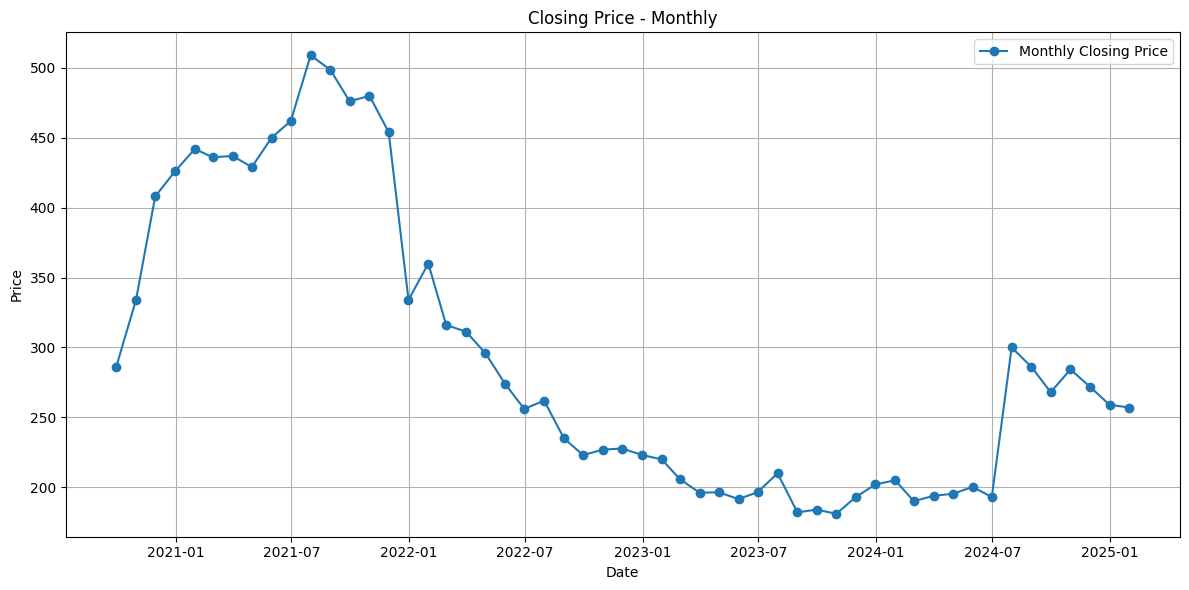

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data["closingPrice"], marker='o', label="Monthly Closing Price")
plt.title("Closing Price - Monthly")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Calculate the following technical indicators from the data and plot them
- Moving Average
- Weighted Moving Average
- RSI
- OBV
- CCI

#### Moving Average

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("PCBL_stock_history.csv", parse_dates=["tradeDate"])

df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

In [17]:
df["MA_5"] = df["closingPrice"].rolling(window=5).mean()
df["MA_20"] = df["closingPrice"].rolling(window=20).mean()

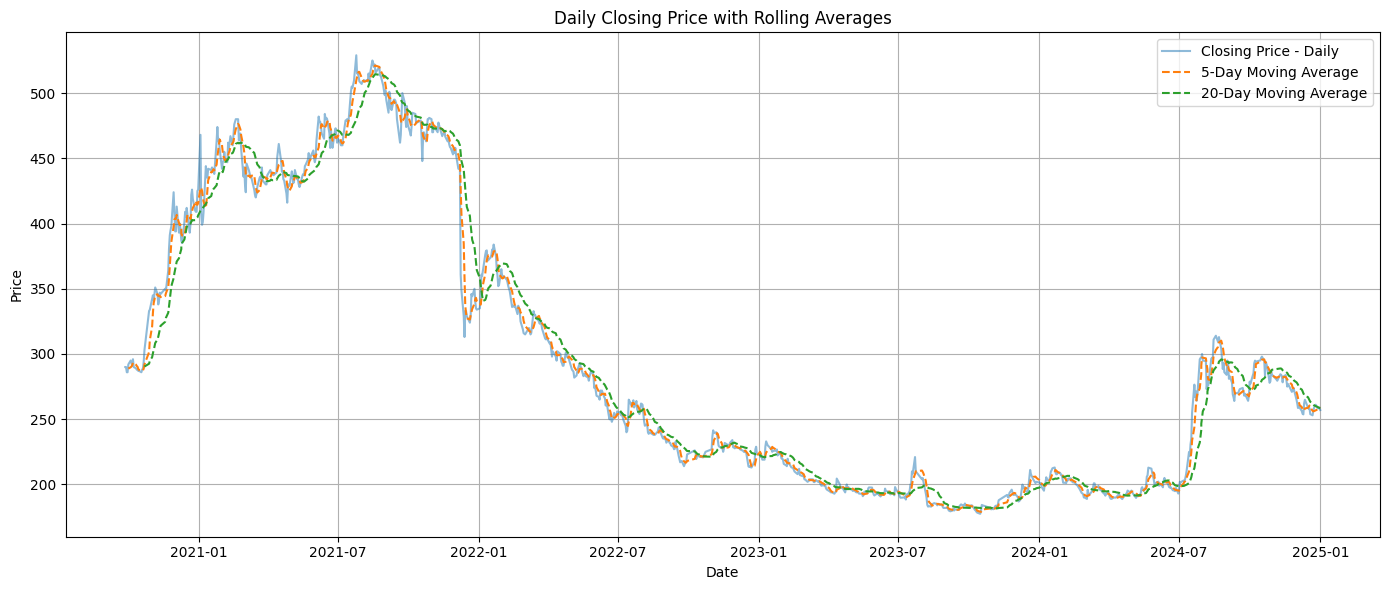

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Closing Price - Daily", alpha=0.5)
plt.plot(df.index, df["MA_5"], label="5-Day Moving Average", linestyle="--")
plt.plot(df.index, df["MA_20"], label="20-Day Moving Average", linestyle="--")
plt.title("Daily Closing Price with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Weighted Moving Average

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("PCBL_stock_history.csv", parse_dates=["tradeDate"])

df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

In [21]:
def weighted_moving_avg(values):
    weights = np.arange(1, len(values)+1)  # e.g., [1,2,3,4,5]
    return np.dot(values, weights) / weights.sum()

df["WMA_5"] = df["closingPrice"].rolling(window=5).apply(weighted_moving_avg, raw=True)

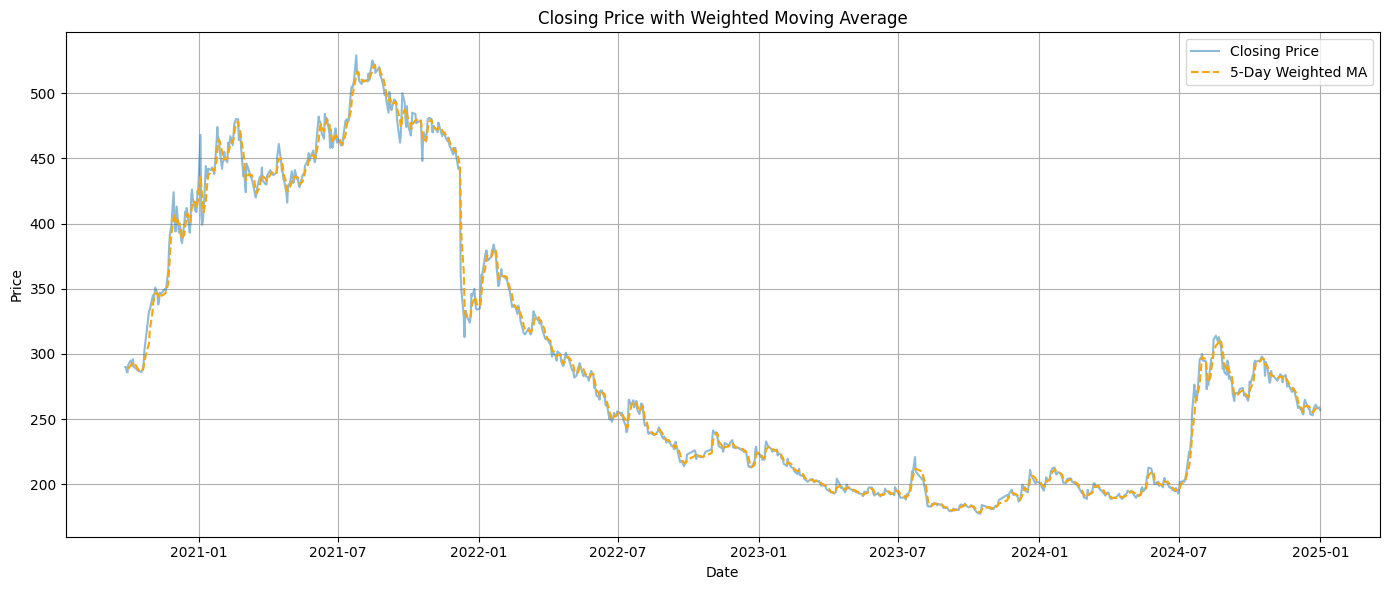

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.5)
plt.plot(df.index, df["WMA_5"], label="5-Day Weighted MA", linestyle="--", color='orange')
plt.title("Closing Price with Weighted Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### RSI

In [23]:
def compute_RSI(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_OBV(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['closingPrice'].iloc[i] > df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] + df['volume'].iloc[i])
        elif df['closingPrice'].iloc[i] < df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] - df['volume'].iloc[i])
        else:
            obv.append(obv[-1])
    return pd.Series(obv, index=df.index)

def compute_CCI(df, window=20):
    TP = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
    MA = TP.rolling(window=window).mean()
    MD = TP.rolling(window=window).apply(lambda x: (x - x.mean()).abs().mean(), raw=False)
    CCI = (TP - MA) / (0.015 * MD)
    return CCI

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("PCBL_stock_history.csv", parse_dates=["tradeDate"])

df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

In [26]:
df["RSI_14"] = compute_RSI(df["closingPrice"], window=14)
df["OBV"] = compute_OBV(df)
df["CCI_20"] = compute_CCI(df, window=20)

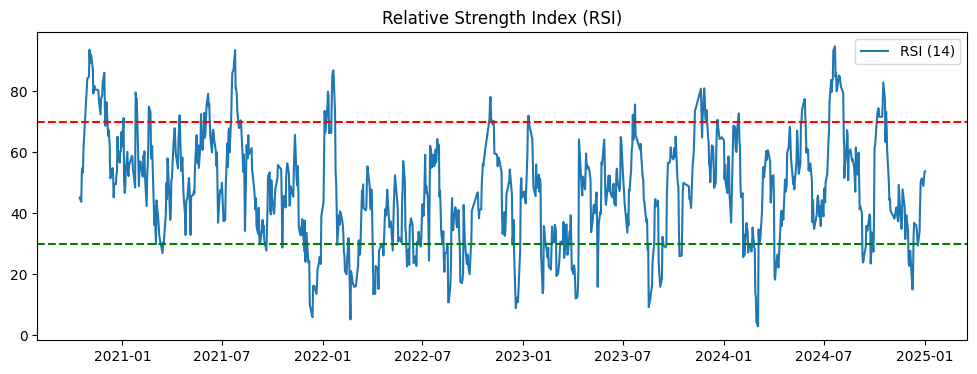

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["RSI_14"], label="RSI (14)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()

#### OBV

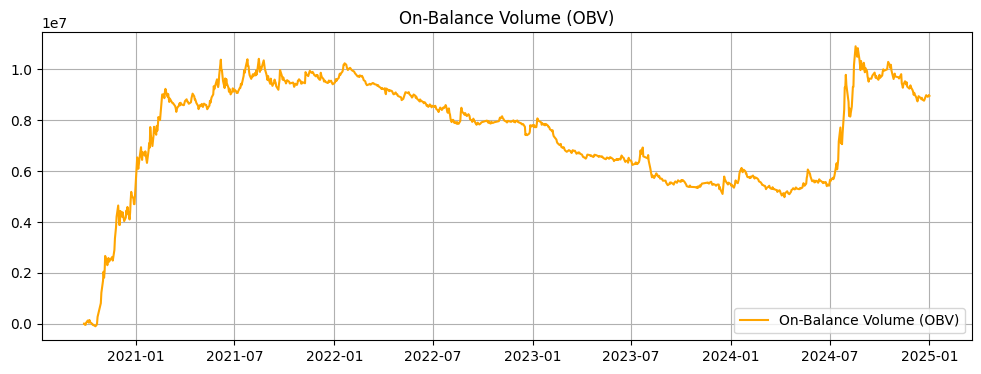

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["OBV"], label="On-Balance Volume (OBV)", color='orange')
plt.title("On-Balance Volume (OBV)")
plt.legend()
plt.grid(True)
plt.show()

#### CCI

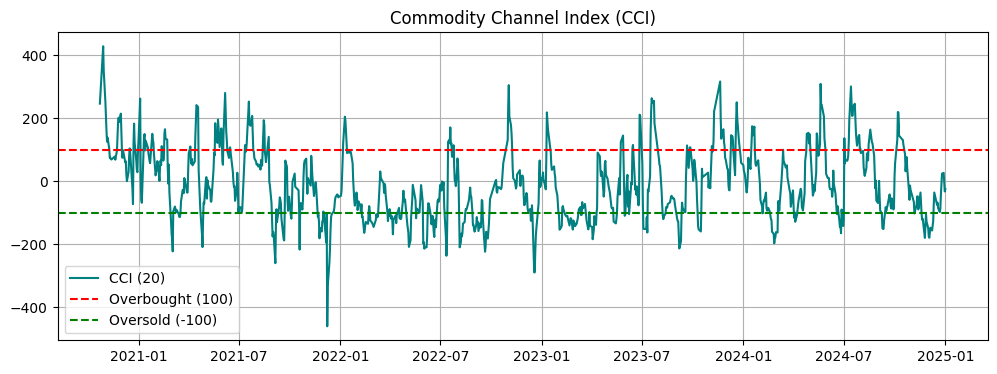

In [29]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["CCI_20"], label="CCI (20)", color='teal')
plt.axhline(100, color='red', linestyle='--', label='Overbought (100)')
plt.axhline(-100, color='green', linestyle='--', label='Oversold (-100)')
plt.title("Commodity Channel Index (CCI)")
plt.legend()
plt.grid(True)
plt.show()